### 非线性回归：多项式回归

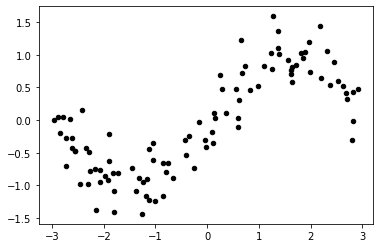

In [8]:
# 数据分布：特征之间的关系
# 线性关系：标签与特征之间的关系，且所有自变量为一次项
# 非线性关系：多项式
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


rnd=np.random.RandomState(42)
x=rnd.uniform(-3,3,size=100) #从输入的任意两个整数中取出size个随机数
y=np.sin(x)+rnd.normal(size=len(x))/3 #生成size个大小服从正态分布的随机数(带有噪声)

plt.scatter(x,y,marker="o",c="k",s=20)
plt.show()

In [9]:
x.shape

(100,)

In [14]:
# 将x升维
x=x.reshape(-1,1)
x.shape

(100, 1)

In [15]:
# 进行建模
LinearR=LinearRegression().fit(x,y)
TreeR=DecisionTreeRegressor(random_state=0).fit(x,y)

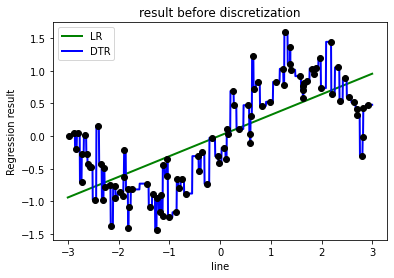

决策树回归发生过拟合
线性回归欠拟合


In [25]:
# 绘图
fig,ax1=plt.subplots(1)

# 创建测试数据集
line=np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

# 将数据带入predict接口
ax1.plot(line,LinearR.predict(line),linewidth=2,color="green",label="LR")
ax1.plot(line,TreeR.predict(line),linewidth=2,color="b",label="DTR")
ax1.plot(x[:,0],y,'o',c="k")
ax1.set_xlabel("line")
ax1.set_title("result before discretization")
ax1.set_ylabel("Regression result")
plt.legend()
plt.show()

print("决策树回归发生过拟合")
print("线性回归欠拟合")

### 非线性模型进行拟合线性模型会出现过拟合
### 线性模型拟合非线性模型会出现欠拟合（可以通过分箱进行处理）


##### 线性模型的决策边界是平行的直线

##### 使用分箱处理非线性问题

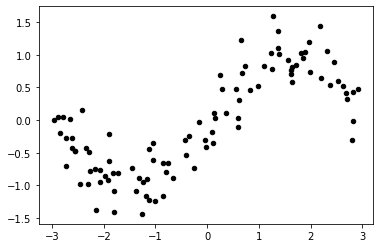

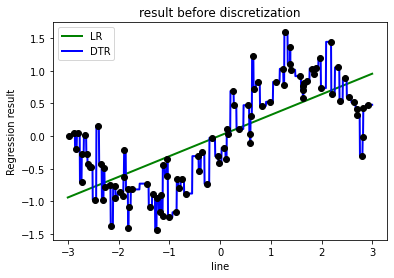

决策树回归发生过拟合
线性回归欠拟合


In [43]:
# 数据分布：特征之间的关系
# 线性关系：标签与特征之间的关系，且所有自变量为一次项
# 非线性关系：多项式
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor


rnd=np.random.RandomState(42)
x=rnd.uniform(-3,3,size=100) #从输入的任意两个整数中取出size个随机数
y=np.sin(x)+rnd.normal(size=len(x))/3 #生成size个大小服从正态分布的随机数(带有噪声)

plt.scatter(x,y,marker="o",c="k",s=20)
plt.show()

# 将x升维
x=x.reshape(-1,1)
x.shape

# 进行建模
LinearR=LinearRegression().fit(x,y)
TreeR=DecisionTreeRegressor(random_state=0).fit(x,y)


# 绘图
fig,ax1=plt.subplots(1)

# 创建测试数据集
line=np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

# 将数据带入predict接口
ax1.plot(line,LinearR.predict(line),linewidth=2,color="green",label="LR")
ax1.plot(line,TreeR.predict(line),linewidth=2,color="b",label="DTR")
ax1.plot(x[:,0],y,'o',c="k")
ax1.set_xlabel("line")
ax1.set_title("result before discretization")
ax1.set_ylabel("Regression result")
plt.legend()
plt.show()

print("决策树回归发生过拟合")
print("线性回归欠拟合")

In [37]:
# 进行分箱
from sklearn.preprocessing import KBinsDiscretizer

# 将数据分箱

enc=KBinsDiscretizer(
    n_bins=10 #分几类
    ,encode="onehot" # ordinal #采用独热编码进行编码,
)
x_binned=enc.fit_transform(x)

# encode使用onehot,使用哑变量方式做离散化
# 之后返回一个稀疏矩阵(m,n_bins)，每一列是一个分好的类型
# 对于每一个样本而言，它包含的分类（箱子）中为二分类（0和1）

x.shape

(100, 1)

In [38]:
x_binned.shape

(100, 10)

In [44]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeRegressor as DTR

import pandas as pd
pd.DataFrame(x_binned.toarray()).head() #分为10箱

# 使用分箱后的数据进行训练

LinearR_=LR().fit(x_binned,y)

LinearR_.predict(line)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10 is different from 1)

In [45]:
line.shape #报错原因，训练集和测试集特征数目不匹配

(1000, 1)

In [46]:
x_binned.shape

(100, 10)

In [47]:
# 对测试数据集进行分箱
line_binned=enc.transform(line)
line_binned.shape

(1000, 10)

In [49]:
LinearR_.predict(line_binned).shape #训练结果

(1000,)

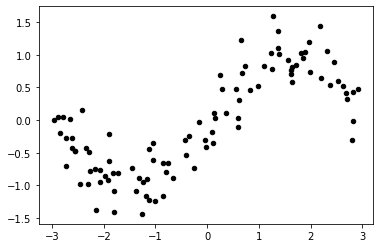

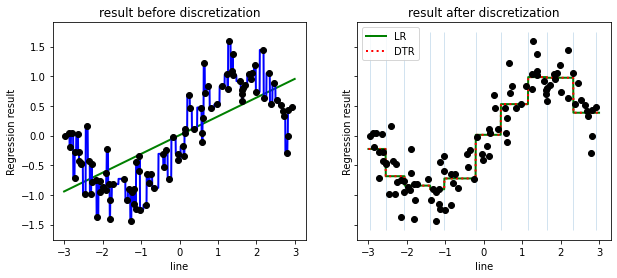

可以使用分箱来预防欠拟合和过拟合


In [60]:
# 数据分布：特征之间的关系
# 线性关系：标签与特征之间的关系，且所有自变量为一次项
# 非线性关系：多项式
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor


rnd=np.random.RandomState(42)
x=rnd.uniform(-3,3,size=100) #从输入的任意两个整数中取出size个随机数
y=np.sin(x)+rnd.normal(size=len(x))/3 #生成size个大小服从正态分布的随机数(带有噪声)

plt.scatter(x,y,marker="o",c="k",s=20)
plt.show()

# 将x升维
x=x.reshape(-1,1)
x.shape

# 进行建模
LinearR=LinearRegression().fit(x,y)
TreeR=DecisionTreeRegressor(random_state=0).fit(x,y)


# 绘图，两张图
fig,(ax1,ax2)=plt.subplots(ncols=2
                           ,sharey=True #让两张图共享y轴上的刻度
                           ,figsize=(10,4) #画布大小
                          )

# 创建测试数据集
line=np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

# 将数据带入predict接口
ax1.plot(line,LinearR.predict(line),linewidth=2,color="green",label="LR")
ax1.plot(line,TreeR.predict(line),linewidth=2,color="b",label="DTR")
ax1.plot(x[:,0],y,'o',c="k")
ax1.set_xlabel("line")
ax1.set_title("result before discretization")
ax1.set_ylabel("Regression result")

# 进行分箱
from sklearn.preprocessing import KBinsDiscretizer
# 将数据分箱
enc=KBinsDiscretizer(
    n_bins=10 #分几类
    ,encode="onehot" # ordinal #采用独热编码进行编码,
)
x_binned=enc.fit_transform(x)
# encode使用onehot,使用哑变量方式做离散化
# 之后返回一个稀疏矩阵(m,n_bins)，每一列是一个分好的类型
# 对于每一个样本而言，它包含的分类（箱子）中为二分类（0和1）
line_binned=enc.transform(line)

LinearR_=LinearRegression().fit(x_binned,y)
TreeR_=DecisionTreeRegressor().fit(x_binned,y)

ax2.plot(line,LinearR_.predict(line_binned),linewidth=2,color="green",label="LR"
        ,linestyle="-")
ax2.plot(line,TreeR_.predict(line_binned),linewidth=2,alpha=1,color="r",label="DTR"
        ,linestyle=":")

ax2.plot(x[:,0],y,'o',c="k")

# 绘制和箱宽一致的竖线
ax2.vlines(
    enc.bin_edges_[0] #x轴,返回分出的箱子的上下限
    ,*plt.gca().get_ylim() #y轴上下限
    ,linewidth=1
    ,alpha=.2
)
ax2.set_xlabel("line")
ax2.set_title("result after discretization")
ax2.set_ylabel("Regression result")


plt.legend()
plt.show()

print("可以使用分箱来预防欠拟合和过拟合")

score is :0.8649


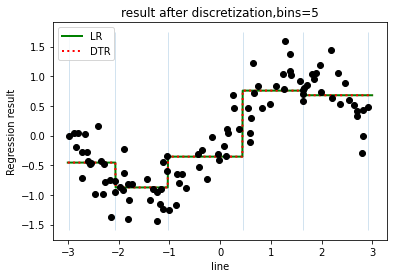

score is :0.9172


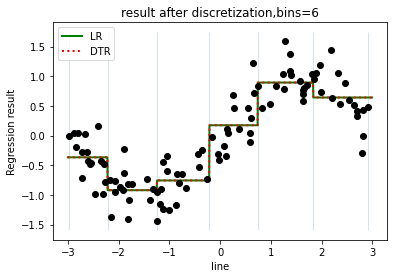

score is :0.9209


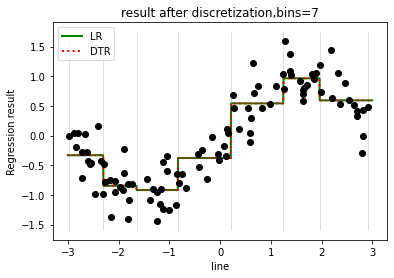

score is :0.9387


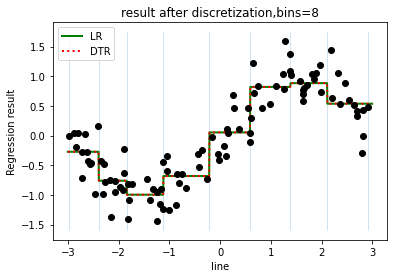

score is :0.9486


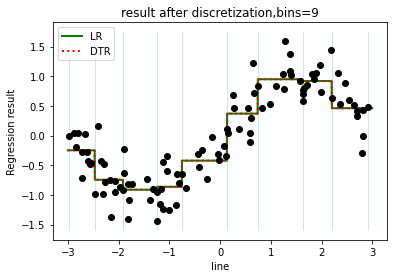

score is :0.9441


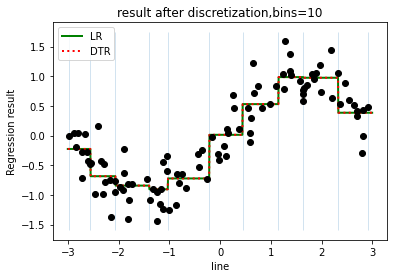

score is :0.9513


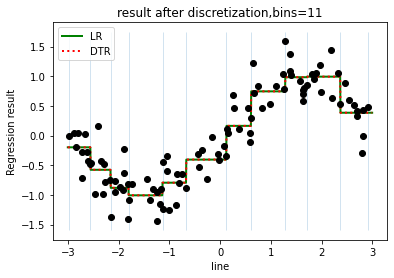

score is :0.9623


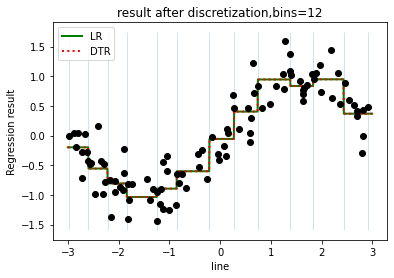

score is :0.9464


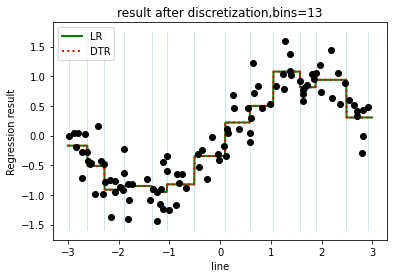

score is :0.9620


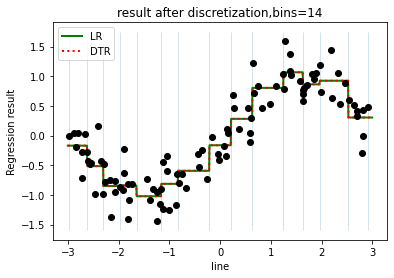

score is :0.9591


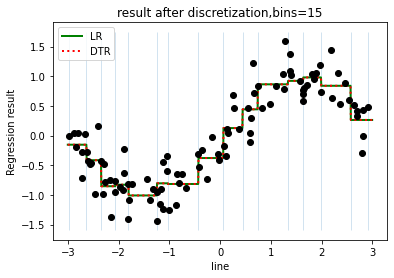

score is :0.9572


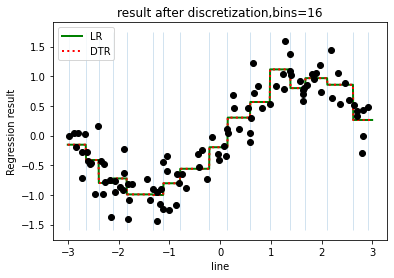

score is :0.9542


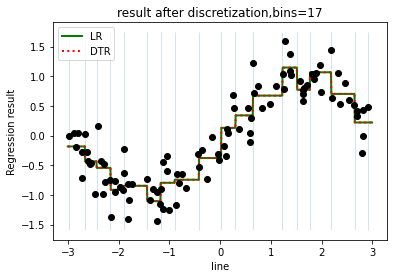

score is :0.9586


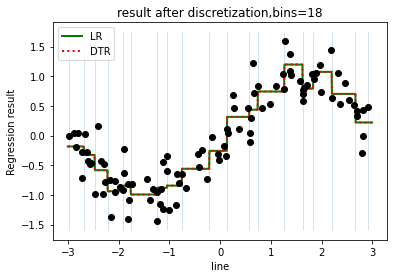

score is :0.9660


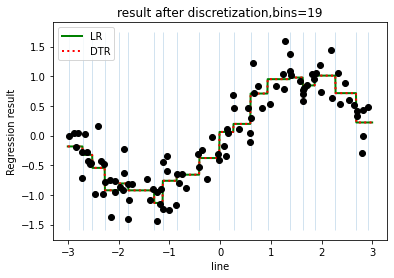

In [71]:
# 分箱的数目对拟合效果的影响

# 数据分布：特征之间的关系
# 线性关系：标签与特征之间的关系，且所有自变量为一次项
# 非线性关系：多项式
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor


rnd=np.random.RandomState(42)
x=rnd.uniform(-3,3,size=100) #从输入的任意两个整数中取出size个随机数
y=np.sin(x)+rnd.normal(size=len(x))/3 #生成size个大小服从正态分布的随机数(带有噪声)


# 将x升维
x=x.reshape(-1,1)
x.shape

# 进行建模
LinearR=LinearRegression().fit(x,y)
TreeR=DecisionTreeRegressor(random_state=0).fit(x,y)




# 创建测试数据集
line=np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

# 进行分箱
from sklearn.preprocessing import KBinsDiscretizer

bins=list(range(5,20))
for b in bins: 
    # 绘图，两张图
    fig,ax2=plt.subplots(1)
    # 将数据分箱
    enc=KBinsDiscretizer(
        n_bins=b #分几类
        ,encode="onehot" # ordinal #采用独热编码进行编码,
    )
    x_binned=enc.fit_transform(x)
    # encode使用onehot,使用哑变量方式做离散化
    # 之后返回一个稀疏矩阵(m,n_bins)，每一列是一个分好的类型
    # 对于每一个样本而言，它包含的分类（箱子）中为二分类（0和1）
    line_binned=enc.transform(line)

    LinearR_=LinearRegression().fit(x_binned,y)
    TreeR_=DecisionTreeRegressor(random_state=0).fit(x_binned,y)

    ax2.plot(line,LinearR_.predict(line_binned),linewidth=2,color="green",label="LR"
            ,linestyle="-")
    ax2.plot(line,TreeR_.predict(line_binned),linewidth=2,alpha=1,color="r",label="DTR"
            ,linestyle=":")

    ax2.plot(x[:,0],y,'o',c="k")

    # 绘制和箱宽一致的竖线
    ax2.vlines(
        enc.bin_edges_[0] #x轴,返回分出的箱子的上下限
        ,*plt.gca().get_ylim() #y轴上下限
        ,linewidth=1
        ,alpha=.2
    )
    ax2.set_xlabel("line")
    ax2.set_title("result after discretization,bins=%d"%b)
    ax2.set_ylabel("Regression result")
    print("score is :%.4f"%LinearR_.score(line_binned,np.sin(line)))
    plt.legend()
    plt.show()


### 如何选取最优箱子数目

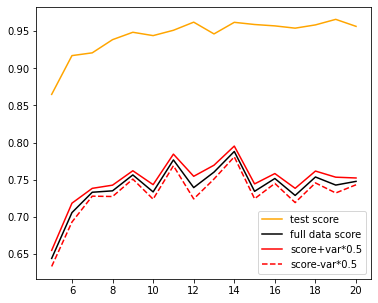

可以通过分箱，来预防回归的欠拟合和过拟合（使用线性模型处理非线性数据）


In [81]:
# 使用交叉验证

from sklearn.model_selection import cross_val_score

# 分箱的数目对拟合效果的影响

# 数据分布：特征之间的关系
# 线性关系：标签与特征之间的关系，且所有自变量为一次项
# 非线性关系：多项式
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor


rnd=np.random.RandomState(42)
x=rnd.uniform(-3,3,size=100) #从输入的任意两个整数中取出size个随机数
y=np.sin(x)+rnd.normal(size=len(x))/3 #生成size个大小服从正态分布的随机数(带有噪声)


# 将x升维
x=x.reshape(-1,1)
x.shape

# 进行建模
LinearR=LinearRegression().fit(x,y)
TreeR=DecisionTreeRegressor(random_state=0).fit(x,y)




# 创建测试数据集
line=np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

# 进行分箱
from sklearn.preprocessing import KBinsDiscretizer
bins=list(range(5,21))

pred,score,var=[],[],[]
for b in bins: 
    # 将数据分箱
    enc=KBinsDiscretizer(
        n_bins=b #分几类
        ,encode="onehot" # ordinal #采用独热编码进行编码,
    )
    x_binned=enc.fit_transform(x) #训练集
    # encode使用onehot,使用哑变量方式做离散化
    # 之后返回一个稀疏矩阵(m,n_bins)，每一列是一个分好的类型
    # 对于每一个样本而言，它包含的分类（箱子）中为二分类（0和1）
    line_binned=enc.transform(line) #测试集
    LinearR_=LinearRegression()
    
    cvresult=cross_val_score(LinearR_,x_binned,y,cv=5) #在全数据集上使用交叉验证
    score.append(cvresult.mean())
    var.append(cvresult.var())
    pred.append(LinearR_.fit(x_binned,y).score(line_binned,np.sin(line)))
    
plt.figure(figsize=(6,5))
plt.plot(bins,pred,c="orange",label="test score")
plt.plot(bins,score,c="k",label="full data score")
plt.plot(bins,score+np.array(var)*0.5,c="r",linestyle="-",label="score+var*0.5")
plt.plot(bins,score-np.array(var)*0.5,c="r",linestyle="--",label="score-var*0.5")
    
plt.legend()
plt.show()
print("可以通过分箱，来预防回归的欠拟合和过拟合（使用线性模型处理非线性数据）")

### 使用多项式变化进行升维

In [92]:
from sklearn.preprocessing import PolynomialFeatures
# 参数
# degree：多项式的次数，默认为2
# interaction_only:布尔值，是否产生交互项，默认为False
# include_bias:布尔值，是否产生与截距项相乘的x0，默认为True

import numpy as np

x=np.arange(1,4).reshape(-1,1)
x

# 二次多项式
poly=PolynomialFeatures(degree=2)
x_=poly.fit_transform(x)
x_.shape
x_

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [93]:
x_=PolynomialFeatures(degree=2,include_bias=False).fit_transform(x)
x_.shape
x_

array([[1., 1.],
       [2., 4.],
       [3., 9.]])

In [95]:
xxx=PolynomialFeatures(degree=3).fit_transform(x)

rnd=np.random.RandomState(42)
y=rnd.randn(3)
y

array([ 0.49671415, -0.1382643 ,  0.64768854])

In [96]:
# 查看生成了多少个系数
LinearRegression().fit(xxx,y).coef_

array([ 3.08086889e-15, -3.51045297e-01, -6.06987134e-01,  2.19575463e-01])

In [99]:
# 查看截距
LinearRegression().fit(xxx,y).intercept_

1.2351711202036884

In [101]:
# 查看截距
LinearRegression(fit_intercept=False).fit(xxx,y).intercept_

0.0

In [105]:
# 当原始特征为二维的时候，变化后会变为6维
x_2=np.arange(1,7).reshape(3,2)
xxx=PolynomialFeatures(degree=2).fit_transform(x_2)
print("分别是：截距系数，原始数据x1和x2，x1平方，x1*x2，x2平方")
xxx

分别是：截距系数，原始数据x1和x2，x1平方，x2平方,x1*x2


array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  3.,  4.,  9., 12., 16.],
       [ 1.,  5.,  6., 25., 30., 36.]])

In [106]:
xxx=PolynomialFeatures(degree=2,interaction_only=True).fit_transform(x_2)
xxx #只是生成交互项

array([[ 1.,  1.,  2.,  2.],
       [ 1.,  3.,  4., 12.],
       [ 1.,  5.,  6., 30.]])

### 多项式回归

train score  0.5361526059318595
test score  0.6800102369793312
poly train score  0.5474794157005722
poly test score  0.6691801248758962


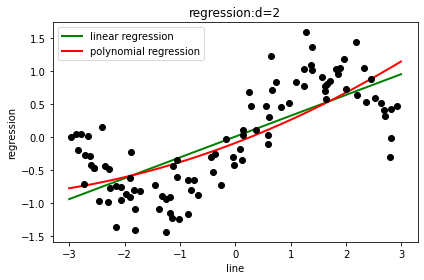

poly train score  0.8517087521131271
poly test score  0.9832550685507532


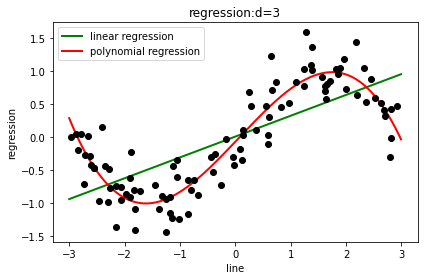

poly train score  0.8539781896834174
poly test score  0.980453874390981


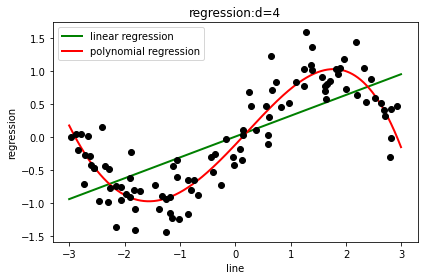

poly train score  0.8561679370344799
poly test score  0.9868904451787956


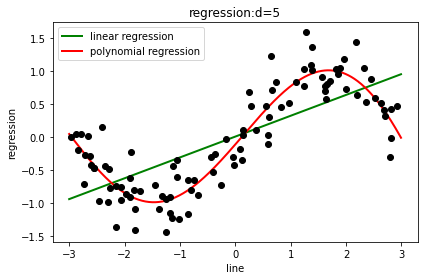

poly train score  0.8562712034203548
poly test score  0.9867294293540145


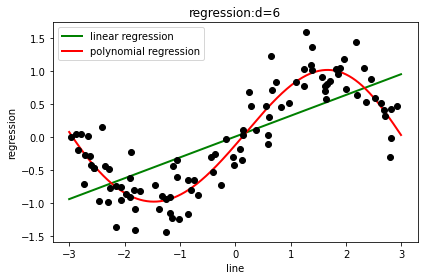

poly train score  0.8563635215478147
poly test score  0.9862564807730297


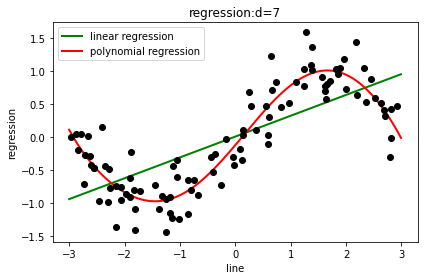

poly train score  0.8563637633178947
poly test score  0.9862495018594799


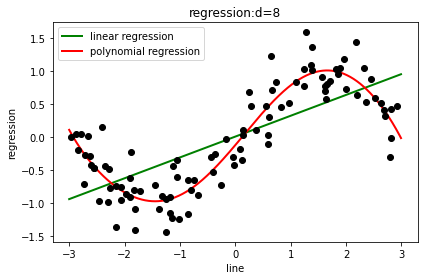

poly train score  0.8579627666094258
poly test score  0.9841964889789323


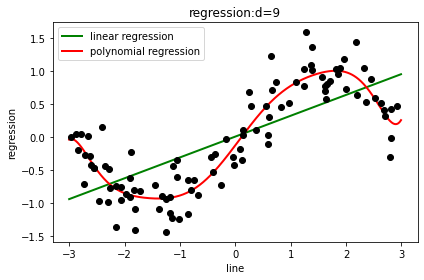

In [120]:
# 使用交叉验证

from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import PolynomialFeatures as PF


rnd=np.random.RandomState(42)
x=rnd.uniform(-3,3,size=100) #从输入的任意两个整数中取出size个随机数
y=np.sin(x)+rnd.normal(size=len(x))/3 #生成size个大小服从正态分布的随机数(带有噪声)

# 将x升维
x=x.reshape(-1,1)

# 创建测试数据集
line=np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

# 进行建模
LinearR=LR().fit(x,y)
print("train score ",LinearR.score(x,y))
print("test score ",LinearR.score(line,np.sin(line)))


# 多项式拟合
# 维数
for d in range(2,10):
    poly=PF(degree=d)
    x_=poly.fit_transform(x)
    line_=poly.transform(line)

    # 调整模型
    LinearR_=LR().fit(x_,y)
    print("poly train score ",LinearR_.score(x_,y))
    print("poly test score ",LinearR_.score(line_,np.sin(line)))


    # 绘制原始预测折线和多项式预测折现
    fig,ax=plt.subplots(1)

    ax.plot(line,LinearR.predict(line),linewidth=2,color="green",label="linear regression ")
    ax.plot(line,LinearR_.predict(line_),linewidth=2,color="red",label="polynomial regression")
    # 原始数据
    ax.plot(x[:,0],y,'o',c="k")

    ax.legend()
    ax.set_title("regression:d=%d"%d)
    ax.set_xlabel("line")
    ax.set_ylabel("regression")
    plt.tight_layout()
    plt.show()

### 多项式回归的可解释性

##### 对于线性回归，可以通过观察系数w直接进行解释
##### 对于多项式回归，可以调用接口get_freature_names()查看新特征矩阵上的名字


In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LinearRegression as LR


x=np.arange(9).reshape(3,3)

poly=PF(degree=3).fit(x)

poly.get_feature_names() #查看新的特征矩阵的名字

['1',
 'x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3']

In [129]:
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd

x=pd.DataFrame(fch().data)
y=fch().target
x.columns=fch().feature_names
poly=PF(degree=3).fit(x) #进行拟合
poly.get_feature_names(x.columns) #新的特征名字

['1',
 'MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'MedInc^2',
 'MedInc HouseAge',
 'MedInc AveRooms',
 'MedInc AveBedrms',
 'MedInc Population',
 'MedInc AveOccup',
 'MedInc Latitude',
 'MedInc Longitude',
 'HouseAge^2',
 'HouseAge AveRooms',
 'HouseAge AveBedrms',
 'HouseAge Population',
 'HouseAge AveOccup',
 'HouseAge Latitude',
 'HouseAge Longitude',
 'AveRooms^2',
 'AveRooms AveBedrms',
 'AveRooms Population',
 'AveRooms AveOccup',
 'AveRooms Latitude',
 'AveRooms Longitude',
 'AveBedrms^2',
 'AveBedrms Population',
 'AveBedrms AveOccup',
 'AveBedrms Latitude',
 'AveBedrms Longitude',
 'Population^2',
 'Population AveOccup',
 'Population Latitude',
 'Population Longitude',
 'AveOccup^2',
 'AveOccup Latitude',
 'AveOccup Longitude',
 'Latitude^2',
 'Latitude Longitude',
 'Longitude^2',
 'MedInc^3',
 'MedInc^2 HouseAge',
 'MedInc^2 AveRooms',
 'MedInc^2 AveBedrms',
 'MedInc^2 Population',
 'MedInc^2 AveOccup',
 'MedInc^2

In [141]:
x_=poly.transform(x)

reg=LR().fit(x_,y)
coef=reg.coef_

[*zip(poly.get_feature_names(x.columns),reg.coef_)]

coeff=pd.DataFrame([poly.get_feature_names(x.columns),reg.coef_.tolist()]).T
coeff.columns=["feature","coef"]
coeff=coeff.sort_values(by="coef") #查看排序后的顺序
coeff.index=range(coeff.shape[0])
coeff #可解释性

,feature,coef
0,Longitude,-79.251379
1,MedInc,-46.076399
2,AveOccup,-15.099723
3,AveBedrms^2,-9.916633
4,AveOccup Latitude,-2.845208
...,...,...
160,HouseAge,15.3867
161,AveBedrms,15.685933
162,AveBedrms Latitude,18.796753
163,AveRooms,65.165934


In [160]:
# 观察使用多项式后提升效果
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LinearRegression as LR
from sklearn.datasets import fetch_california_housing as fch


x=pd.DataFrame(fch().data)
y=fch().target


x.columns=fch().feature_names
poly=PF(degree=3).fit(x) #进行拟合
x_=poly.transform(x)

reg=LR().fit(x,y)
print("LR R2 score is ",reg.score(x,y))

from time import time
begin=time()
reg_=LR().fit(x_,y)
print("poly LR R2 score is",reg_.score(x_,y))
print("time cost:{}".format(time()-begin)) #时间开销较小
      
from sklearn.ensemble import RandomForestRegressor as RFR #非线性回归
begin=time()
print("RandomForestRegressor r2 score is ",RFR(n_estimators=200).fit(x,y).score(x,y))
print("time cost:{}".format(time()-begin)) #时间开销大

LR R2 score is  0.606232685199805
poly LR R2 score is 0.7381774751350663
time cost:0.13903236389160156
RandomForestRegressor r2 score is  0.9748982751563267
time cost:18.47566866874695


##### 狭义线性：自变量上不能有高次项，自变量与标签关系不能存在非线性关系
##### 广义线性：标签与模型拟合出来的参数之间的关系是线性的，模型就是线性的